<a href="https://colab.research.google.com/github/young-hwanlee/stand_alone_deep_learning/blob/main/%237_Multi_Class_Classification_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !gist clone https://github.com/young-hwanlee/stand_alone_deep_learning.git

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# ===== Generate Dataset ===== #
r = np.random.rand(10000)*3
theta = np.random.rand(10000)*2*np.pi
y = r.astype(int)
r = r*(np.cos(theta) + 1)
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
X = np.array([x1, x2]).T

In [4]:
# ===== Split Datast into Train, Validation, Test ===== #
train_X, train_y = X[:8000, :], y[:8000]
val_X, val_y = X[8000:9000, :], y[8000:9000]
test_X, test_y = X[9000:, :], y[9000:]

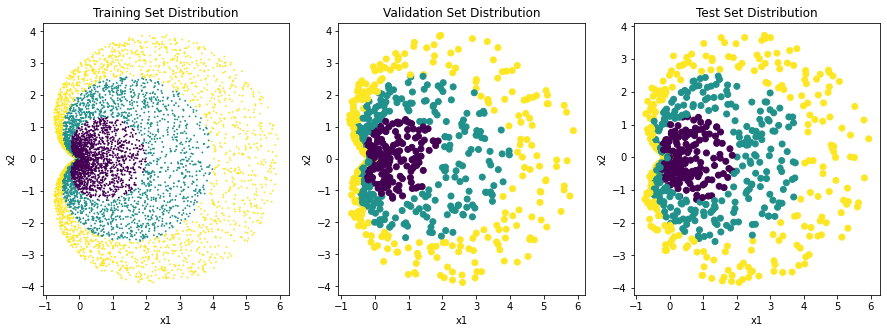

In [5]:
# ===== Visualize Each Dataset ===== #
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, s=0.7)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('Training Set Distribution')

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(val_X[:, 0], val_X[:, 1], c=val_y)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Validation Set Distribution')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(test_X[:, 0], test_X[:, 1], c=test_y)
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Test Set Distribution')

plt.show()

In [6]:
import torch
import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=2, out_features=3, bias=True)

    def forward(self, x):
        x = self.linear(x)
        return x

class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [7]:
cross_entropy_loss = nn.CrossEntropyLoss()        # -> equivalent to the combination of LogSoftmax and NLLLoss

In [8]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

# ===== Construct Model ===== #
model = MLPModel()
print('{} parameters'.format(sum(param.numel() for param in model.parameters() if param.requires_grad)))

# ===== Construct Optimizer ===== #
lr = 0.005
optimizer = optim.SGD(model.parameters(), lr=lr)

1203 parameters


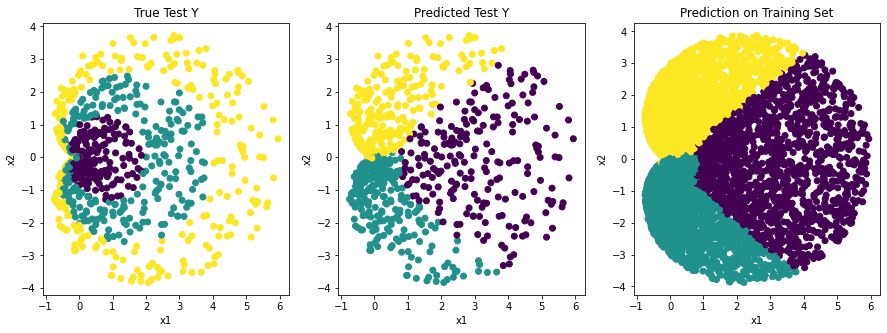

Epoch:  0    Accuracy:  31.8 %


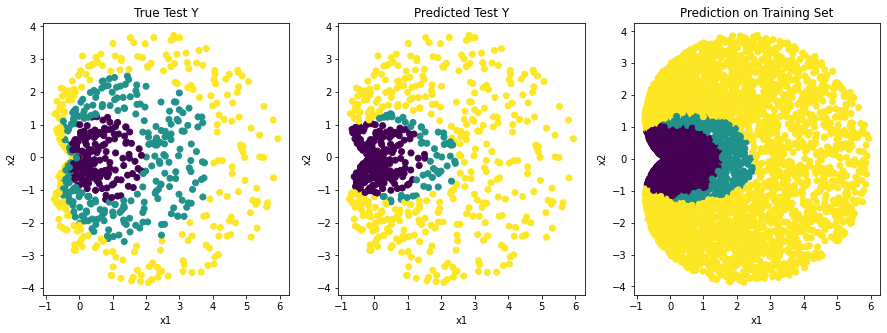

Epoch:  200    Accuracy:  53.2 %


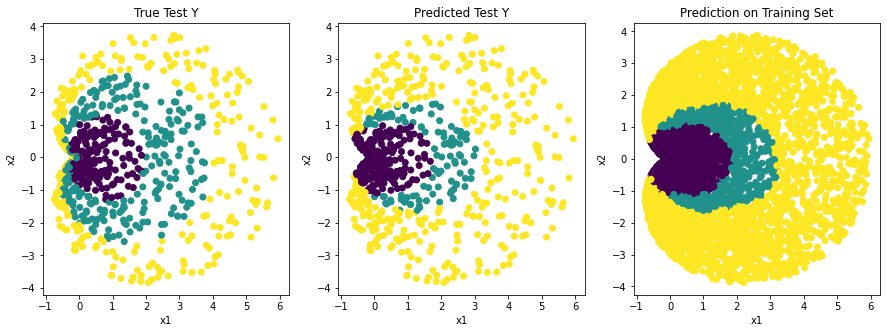

Epoch:  400    Accuracy:  61.0 %


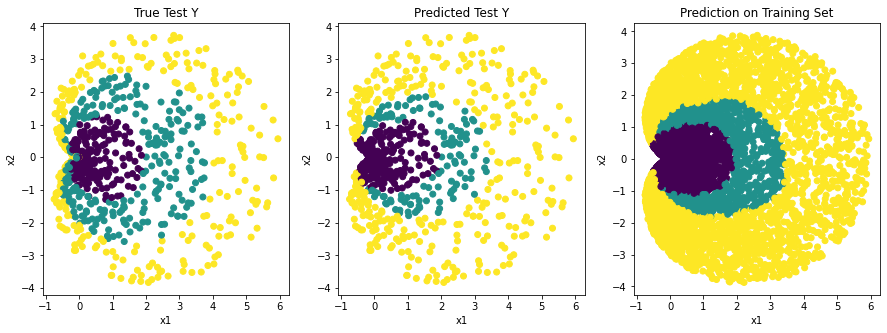

Epoch:  600    Accuracy:  66.3 %


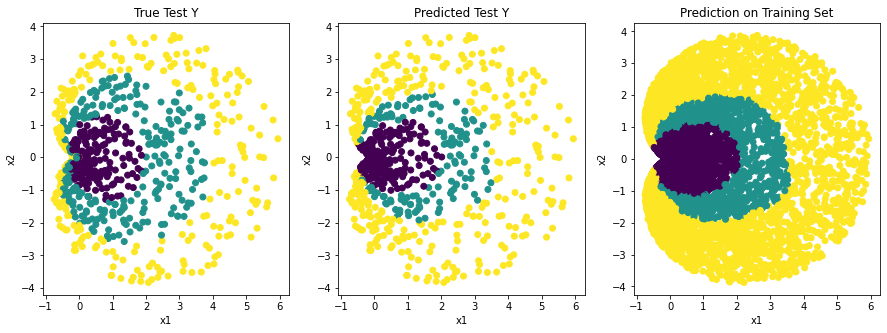

Epoch:  800    Accuracy:  68.5 %


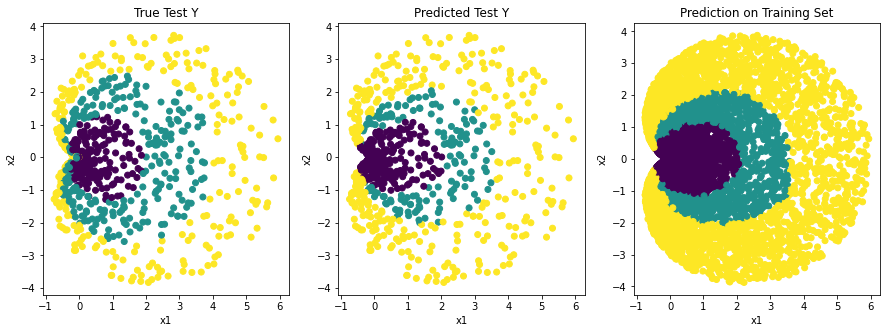

Epoch:  1000    Accuracy:  68.89999999999999 %


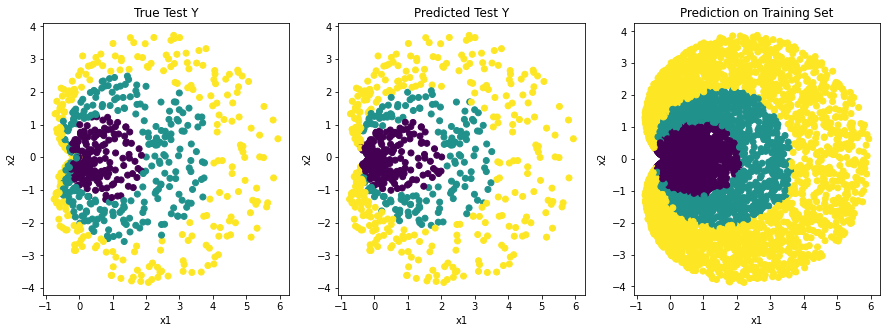

Epoch:  1200    Accuracy:  71.3 %


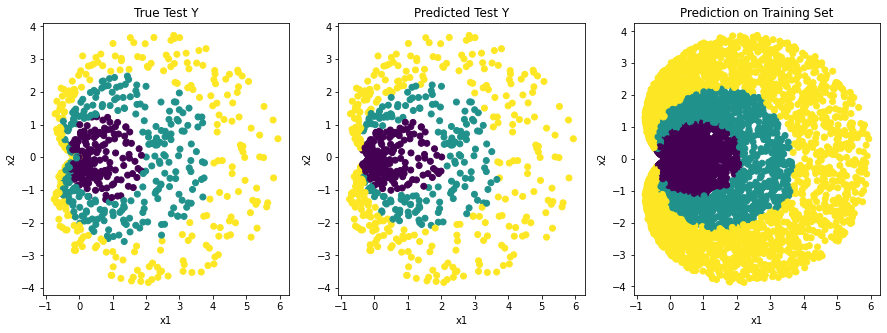

Epoch:  1400    Accuracy:  72.39999999999999 %


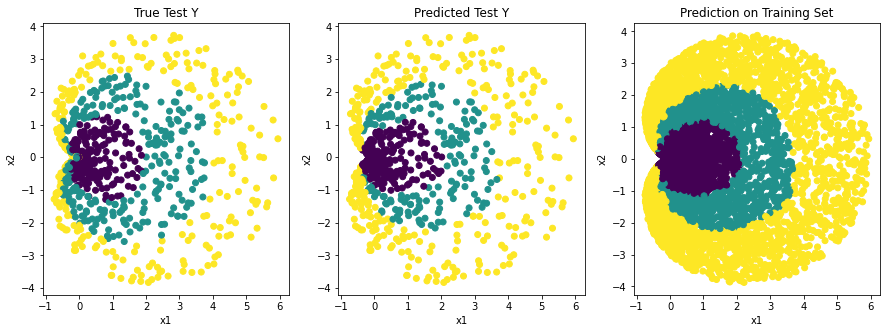

Epoch:  1600    Accuracy:  72.89999999999999 %


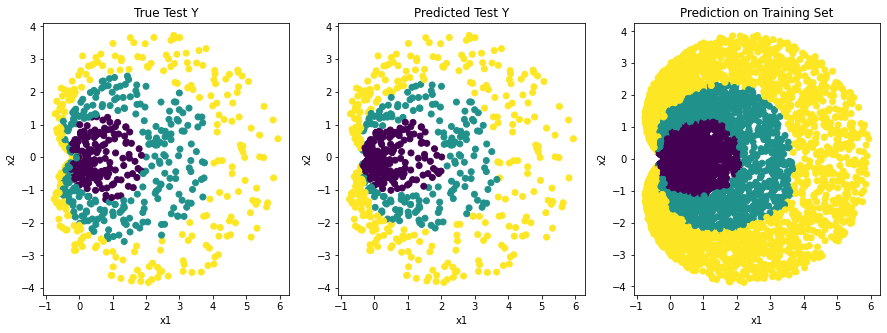

Epoch:  1800    Accuracy:  73.1 %


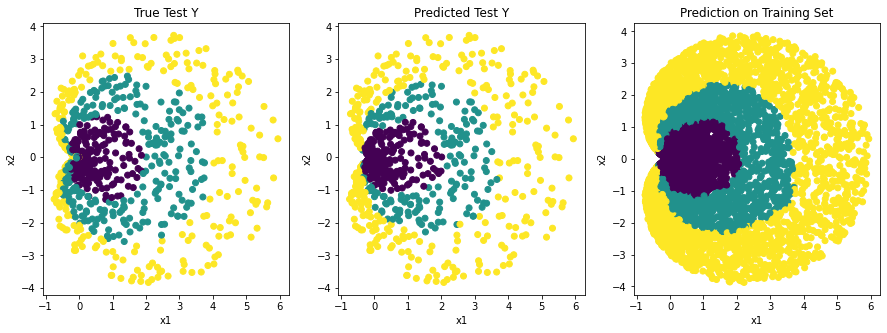

Epoch:  2000    Accuracy:  73.8 %


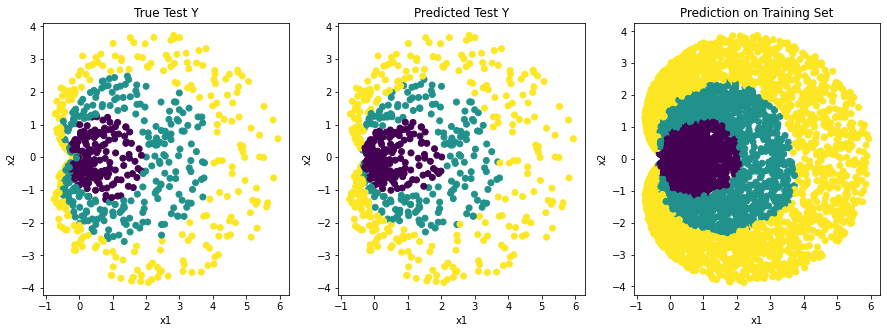

Epoch:  2200    Accuracy:  74.7 %


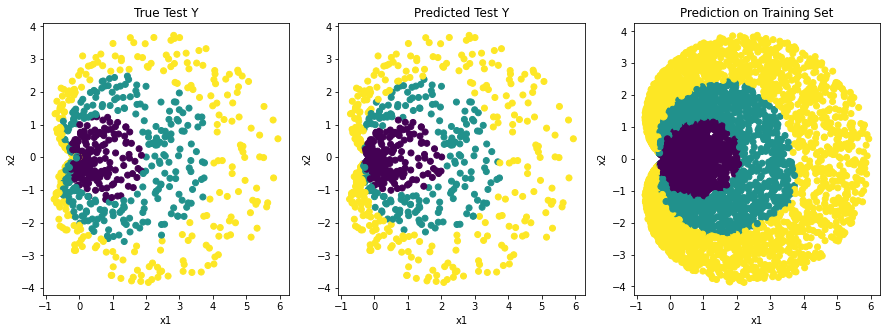

Epoch:  2400    Accuracy:  75.6 %


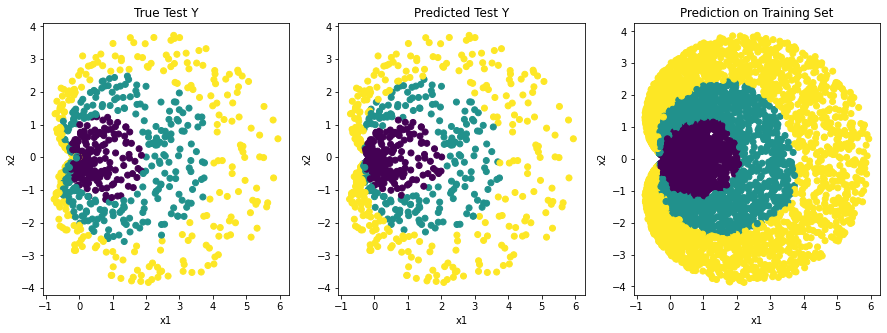

Epoch:  2600    Accuracy:  76.1 %


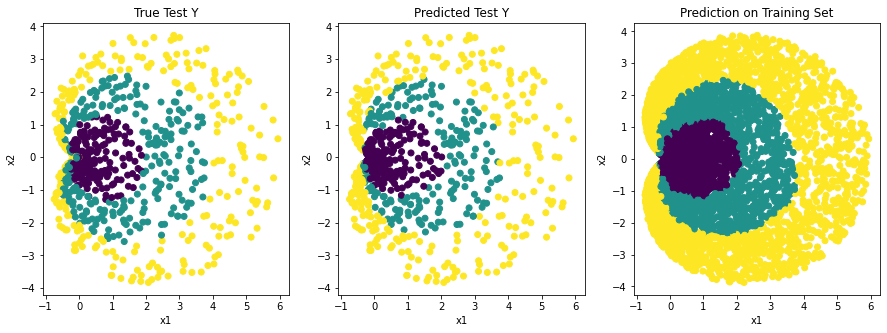

Epoch:  2800    Accuracy:  76.3 %


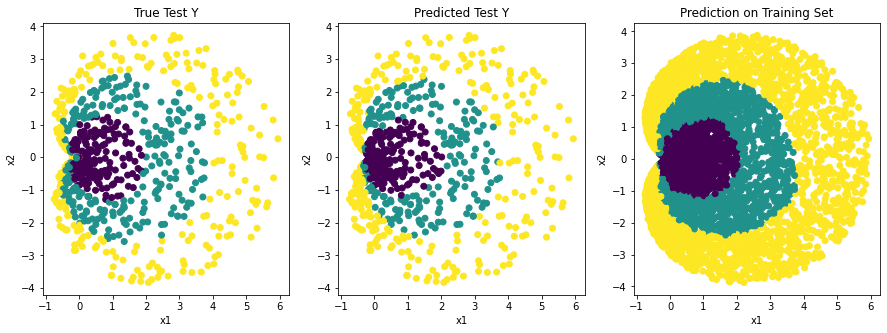

Epoch:  3000    Accuracy:  76.9 %


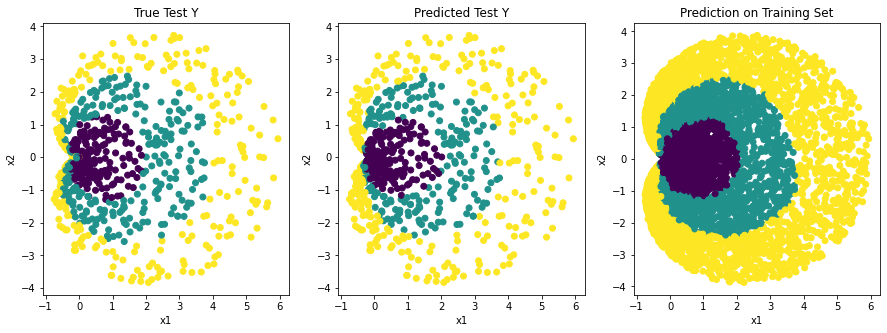

Epoch:  3200    Accuracy:  77.60000000000001 %


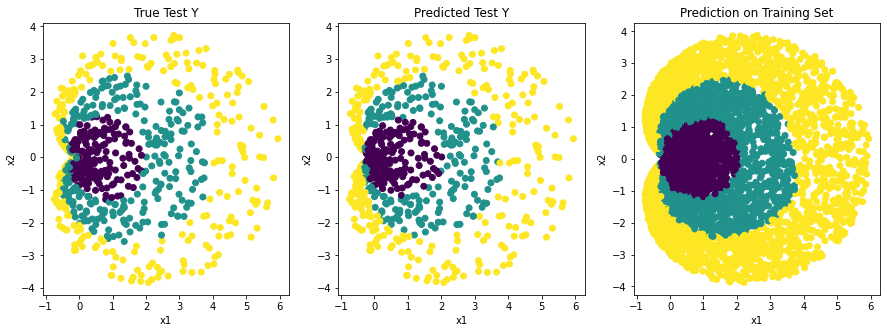

Epoch:  3400    Accuracy:  77.7 %


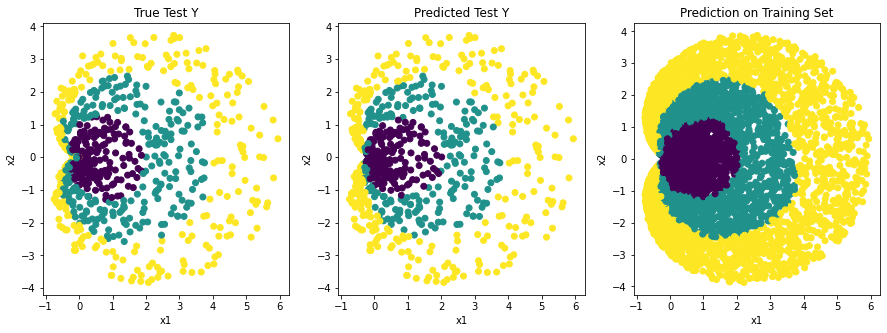

Epoch:  3600    Accuracy:  78.10000000000001 %


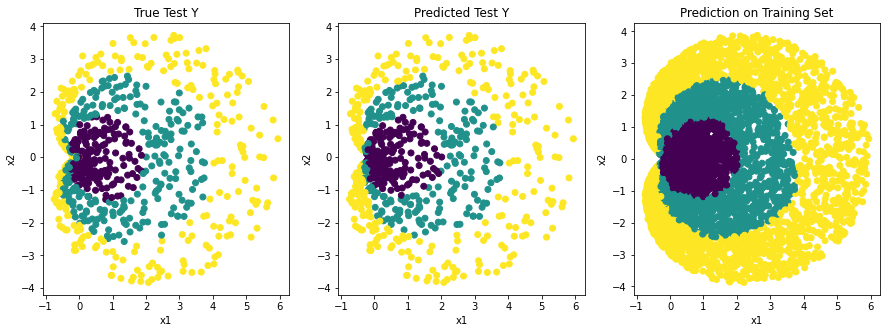

Epoch:  3800    Accuracy:  78.4 %


In [9]:
hist_epoch = []
hist_train_loss = []
hist_val_loss = []
hist_acc = []
hist_acc_epoch = []

epoch = 4000
for i in range(epoch):
    # ===== Train ===== #
    model.train()
    optimizer.zero_grad()

    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y).long()
    pred_y = model(input_x)

    loss = cross_entropy_loss(pred_y.squeeze(), true_y)
    loss.backward()
    optimizer.step()
    hist_epoch.append(i)
    # hist_train_loss.append(loss.detach().numpy())
    hist_train_loss.append(loss.item())

    # ===== Validation ===== #
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y).long()
    pred_y = model(input_x)
    loss = cross_entropy_loss(pred_y.squeeze(), true_y)
    # hist_val_loss.append(loss.detach().numpy())
    hist_val_loss.append(loss.item())

    # ===== Test ===== #
    if i%200 == 0:
        # ===== Calculate Accuracy ===== #
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)

        # print(model(input_x))
        # print(model(input_x).detach())
        # # print(model(input_x).detach().max(dim=1))
        # print(model(input_x).detach().max(dim=1)[0])
        # print(model(input_x).detach().max(dim=1)[1])
        pred_y = model(input_x).detach().max(dim=1)[1].numpy()

        acc = accuracy_score(true_y, pred_y)
        hist_acc.append(acc)
        hist_acc_epoch.append(i)

        fig = plt.figure(figsize=(15, 5))

        # ===== True Scattering ===== #
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.scatter(test_X[:, 0], test_X[:, 1], c=test_y)
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_title('True Test Y')

        # ===== Predicted Y Scattering ===== #
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.scatter(test_X[:, 0], test_X[:, 1], c=pred_y)
        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_title('Predicted Test Y')

        # ===== Just for Visualizing with High Resolution ===== #
        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().max(dim=1)[1].numpy()

        ax3 = fig.add_subplot(1, 3, 3)
        ax3.scatter(train_X[:, 0], train_X[:, 1], c=pred_y)
        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_title('Prediction on Training Set')

        plt.show()
        print('Epoch: ', i, '   Accuracy: ', acc*100, '%')

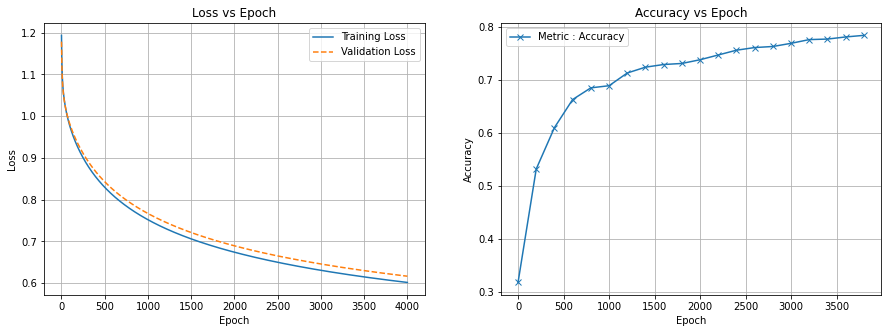

In [10]:
fig = plt.figure(figsize=(15, 5))

# ===== Loss ===== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(hist_epoch, hist_train_loss, label='Training Loss')
ax1.plot(hist_epoch, hist_val_loss, '--', label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()
ax1.set_title('Loss vs Epoch')

# ===== Metric : Accuracy ===== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(hist_acc_epoch, hist_acc, marker='x', label='Metric : Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()
ax2.set_title('Accuracy vs Epoch')

plt.show()